<a href="https://colab.research.google.com/github/flylovedot/autogen/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install torch torchvision torchaudio
!pip install ultralytics
!pip install opencv-python-headless
!pip install matplotlib
!sudo apt-get install ffmpeg
!pip install roboflow
!pip install thop
!pip install dill
!pip install pyyaml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjit

In [6]:
# 检查是否在Colab环境中运行
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False
print(f"Running in Colab: {IN_COLAB}")

# 导入必要的库
import os
import cv2
import shutil
import random
from pathlib import Path
from ultralytics import YOLO
import yaml
import torch
import matplotlib.pyplot as plt
import sys
from google.colab import drive
import time

Running in Colab: True
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [2]:
import os  # 导入 os 模块

from google.colab import drive

# 挂载 Google Drive
drive.mount('/content/drive')

# 检查挂载路径是否存在
if os.path.exists('/content/drive/MyDrive'):
    print("Google Drive 已成功挂载！")
else:
    print("Google Drive 挂载失败，请重新尝试。")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Drive 已成功挂载！


In [7]:
# 检查GPU是否可用
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"使用设备: {device}")

# 检查可用内存
!nvidia-smi
!free -h

# 清理 GPU 缓存函数
def clear_gpu_memory():
    torch.cuda.empty_cache()
    import gc
    gc.collect()

# 显示执行效果
def show_system_info():
    print("\n=== 系统信息 ===")
    print("Python 版本:", sys.version)
    print("PyTorch 版本:", torch.__version__)
    print("CUDA 是否可用:", torch.cuda.is_available())
    if torch.cuda.is_available():
        print("CUDA 版本:", torch.version.cuda)
        print("当前GPU:", torch.cuda.get_device_name(0))
        print("\nGPU内存使用情况:")
        print(torch.cuda.memory_summary())

show_system_info()


使用设备: cpu
/bin/bash: line 1: nvidia-smi: command not found
               total        used        free      shared  buff/cache   available
Mem:            50Gi       1.2Gi        32Gi       1.0Mi        17Gi        49Gi
Swap:             0B          0B          0B

=== 系统信息 ===
Python 版本: 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
PyTorch 版本: 2.5.1+cu124
CUDA 是否可用: False


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Drive 已成功挂载！
创建根目录: /content/drive/MyDrive/dataset
创建目录: /content/drive/MyDrive/dataset/images/train
创建目录: /content/drive/MyDrive/dataset/images/val
创建目录: /content/drive/MyDrive/dataset/labels/train
创建目录: /content/drive/MyDrive/dataset/labels/val
使用数据集路径: /content/drive/MyDrive/Helmet_42_yolo_dataset
检查数据集目录结构...
/content/drive/MyDrive/Helmet_42_yolo_dataset:
classes.txt  images  labels

/content/drive/MyDrive/Helmet_42_yolo_dataset/images:
test  train  val

/content/drive/MyDrive/Helmet_42_yolo_dataset/images/test:
 000002.jpg		 part2_000339.jpg	    PartA_00504.jpg	       PartB_00465.jpg
 000005.jpg		 part2_000341.jpg	    PartA_00510.jpg	       PartB_00469.jpg
 000019.jpg		 part2_000343.jpg	    PartA_00512.jpg	       PartB_00474.jpg
 000022.jpg		 part2_000350.jpg	    PartA_00519.jpg	       PartB_00477.jpg
 000027.jpg		 part2_000355.jpg	    PartA_00528

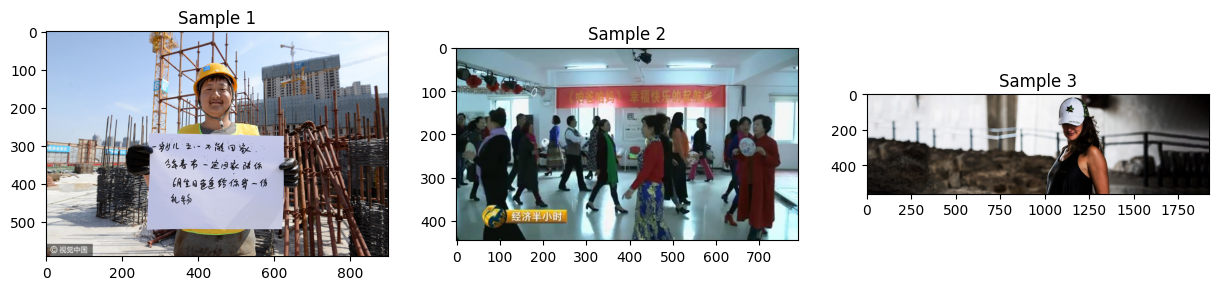


val集:
图片数量: 607
标签数量: 607


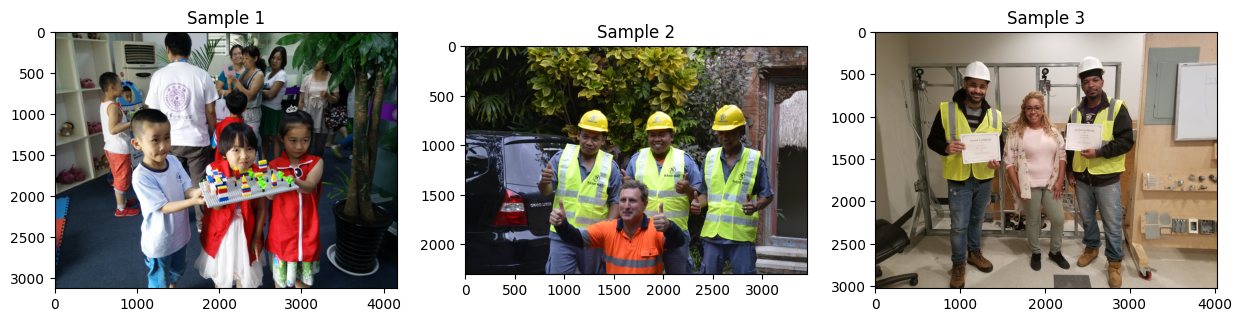

In [8]:
import os
import shutil
from pathlib import Path
import matplotlib.pyplot as plt
from google.colab import drive

# 挂载 Google Drive
drive.mount('/content/drive')

# 检查挂载路径是否存在
if os.path.exists('/content/drive/MyDrive'):
    print("Google Drive 已成功挂载！")
else:
    print("Google Drive 挂载失败，请检查权限或网络连接。")

class YOLODataset:
    def __init__(self, root_dir='/content/drive/MyDrive/dataset'):
        self.root_dir = root_dir
        self.structure = {
            'images': {
                'train': os.path.join(root_dir, 'images', 'train'),
                'val': os.path.join(root_dir, 'images', 'val')
            },
            'labels': {
                'train': os.path.join(root_dir, 'labels', 'train'),
                'val': os.path.join(root_dir, 'labels', 'val')
            }
        }
        self._validate_root_dir()

    def _validate_root_dir(self):
        """验证根目录是否存在，如果不存在则创建"""
        root_path = Path(self.root_dir)
        if not root_path.exists():
            root_path.mkdir(parents=True, exist_ok=True)
            print(f"创建根目录: {root_path}")

    def create_structure(self):
        """创建数据集所需的目录结构"""
        for data_type in self.structure:
            for split in self.structure[data_type]:
                path = Path(self.structure[data_type][split])
                path.mkdir(parents=True, exist_ok=True)
                print(f"创建目录: {path}")

    def print_structure(self):
        """打印数据集的结构"""
        print("\n=== 数据集结构 ===")
        for data_type in self.structure:
            for split in self.structure[data_type]:
                print(f"{data_type}/{split}: {self.structure[data_type][split]}")

    def check_source_structure(self, source_dir):
        """检查源数据集的结构并返回匹配的路径"""
        source_dir = Path(source_dir)

        # 可能的目录结构类型
        possible_structures = [
            # 标准结构: images/train, images/val, labels/train, labels/val
            {
                'images': {'train': 'images/train', 'val': 'images/val'},
                'labels': {'train': 'labels/train', 'val': 'labels/val'}
            },
            # 简单结构: train/images, train/labels, val/images, val/labels
            {
                'images': {'train': 'train/images', 'val': 'val/images'},
                'labels': {'train': 'train/labels', 'val': 'val/labels'}
            },
            # 平铺结构: train, val (包含混合的图片和标签)
            {
                'images': {'train': 'train', 'val': 'val'},
                'labels': {'train': 'train', 'val': 'val'}
            }
        ]

        for structure in possible_structures:
            if self._validate_structure(source_dir, structure):
                print(f"找到匹配的数据集结构: {structure}")
                return structure

        raise ValueError(f"无法识别数据集结构: {source_dir}")

    def _validate_structure(self, source_dir, structure):
        """验证特定结构是否存在"""
        try:
            for data_type in ['images', 'labels']:
                for split in ['train', 'val']:
                    path = source_dir / structure[data_type][split]
                    if not path.exists():
                        return False
            return True
        except Exception:
            return False

    def merge_dataset(self, source_dir):
        """合并其他数据集到当前数据集"""
        source_dir = Path(source_dir)
        print(f"开始合并数据集: {source_dir}")

        # 检查并获取源数据集结构
        try:
            source_structure = self.check_source_structure(source_dir)
        except ValueError as e:
            print(f"错误: {e}")
            return

        # 合并训练集和验证集
        for split in ['train', 'val']:
            src_img_dir = source_dir / source_structure['images'][split]
            src_label_dir = source_dir / source_structure['labels'][split]
            dst_img_dir = Path(self.structure['images'][split])
            dst_label_dir = Path(self.structure['labels'][split])

            print(f"合并{split}集...")
            self._merge_files(src_img_dir, dst_img_dir, src_label_dir, dst_label_dir)

    def _merge_files(self, src_img_dir, dst_img_dir, src_label_dir, dst_label_dir):
        """复制图片和标签文件到目标目录"""
        files_count = 0
        for img_file in src_img_dir.glob('*'):
            if img_file.suffix.lower() in ['.jpg', '.jpeg', '.png']:
                # 复制图片
                shutil.copy2(img_file, dst_img_dir / img_file.name)

                # 复制对应的标签文件
                label_file = src_label_dir / f"{img_file.stem}.txt"
                if label_file.exists():
                    shutil.copy2(label_file, dst_label_dir / label_file.name)
                    files_count += 1

        print(f"已复制 {files_count} 对文件")

    def show_dataset_statistics(self):
        """显示数据集的统计信息"""
        print("\n=== 数据集统计 ===")
        for split in ['train', 'val']:
            img_path = Path(self.structure['images'][split])
            label_path = Path(self.structure['labels'][split])

            num_images = len(list(img_path.glob('*.jpg'))) + len(list(img_path.glob('*.png')))
            num_labels = len(list(label_path.glob('*.txt')))

            print(f"\n{split}集:")
            print(f"图片数量: {num_images}")
            print(f"标签数量: {num_labels}")

            # 显示一些样本图片
            if num_images > 0:
                sample_images = list(img_path.glob('*.jpg'))[:3]
                plt.figure(figsize=(15, 5))
                for i, img_path in enumerate(sample_images, 1):
                    img = plt.imread(str(img_path))
                    plt.subplot(1, len(sample_images), i)
                    plt.imshow(img)
                    plt.title(f'Sample {i}')
                plt.show()

# Colab使用示例
try:
    # 创建数据集对象
    dataset = YOLODataset(root_dir='/content/drive/MyDrive/dataset')
    dataset.create_structure()

    # 使用Google Drive中的数据集路径
    helmet_dataset_path = '/content/drive/MyDrive/Helmet_42_yolo_dataset'

    print(f"使用数据集路径: {helmet_dataset_path}")
    print("检查数据集目录结构...")
    # 打印目录内容以便调试
    !ls -R {helmet_dataset_path}

    dataset.merge_dataset(helmet_dataset_path)
    print("数据集合并完成")
except Exception as e:
    print(f"合并数据集时出错: {str(e)}")
    import traceback
    print(traceback.format_exc())

dataset.print_structure()
dataset.show_dataset_statistics()

流式输出内容被截断，只能显示最后 5000 行内容。
处理图片 /content/drive/MyDrive/dataset/images/train/山焦华晋-沙曲二矿3#底抽巷迎头_20240731110000-20240731123000_2_0463.jpg 时出错: name 'Image' is not defined
处理图片 /content/drive/MyDrive/dataset/images/train/山焦华晋-沙曲二矿3#底抽巷迎头_20240731110000-20240731123000_2_0464.jpg 时出错: name 'Image' is not defined
处理图片 /content/drive/MyDrive/dataset/images/train/山焦华晋-沙曲二矿3#底抽巷迎头_20240731110000-20240731123000_2_0465.jpg 时出错: name 'Image' is not defined
处理图片 /content/drive/MyDrive/dataset/images/train/山焦华晋-沙曲二矿3#底抽巷迎头_20240731110000-20240731123000_2_0466.jpg 时出错: name 'Image' is not defined
处理图片 /content/drive/MyDrive/dataset/images/train/山焦华晋-沙曲二矿3#底抽巷迎头_20240731110000-20240731123000_2_0467.jpg 时出错: name 'Image' is not defined
处理图片 /content/drive/MyDrive/dataset/images/train/山焦华晋-沙曲二矿3#底抽巷迎头_20240731110000-20240731123000_2_0468.jpg 时出错: name 'Image' is not defined
处理图片 /content/drive/MyDrive/dataset/images/train/山焦华晋-沙曲二矿3#底抽巷迎头_20240731110000-20240731123000_2_0469.jpg 时出错: name 'Image' is not d

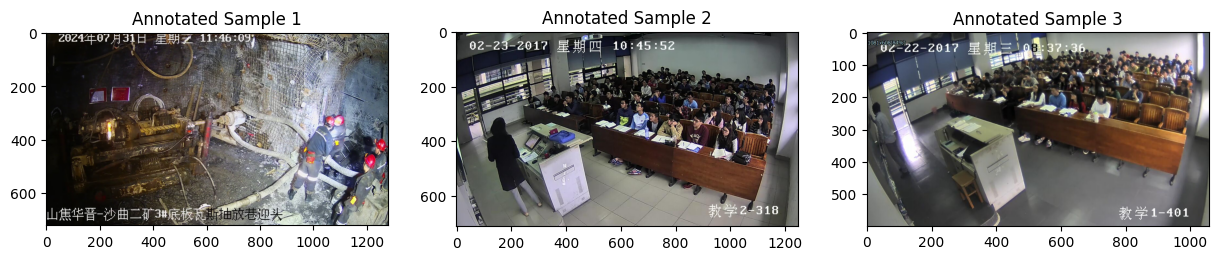

In [10]:
# 2. 定义 YOLODataset 类
class YOLODataset:
    def __init__(self, root_dir='/content/drive/MyDrive/dataset'):
        """
        初始化 YOLODataset 类。

        Args:
            root_dir (str): 数据集的根目录，用于存放提取的帧和标签文件。
        """
        self.root_dir = Path(root_dir)
        self.structure = {
            'images': {
                'train': self.root_dir / 'images/train',
                'val': self.root_dir / 'images/val'
            },
            'labels': {
                'train': self.root_dir / 'labels/train',
                'val': self.root_dir / 'labels/val'
            }
        }
        # 创建目录结构
        for folder in self.structure['images'].values():
            folder.mkdir(parents=True, exist_ok=True)
        for folder in self.structure['labels'].values():
            folder.mkdir(parents=True, exist_ok=True)

    def extract_frames(self, video_path, output_dir='images/train', frame_interval=10):
        """
        从视频中提取帧并保存到指定目录。

        Args:
            video_path (str): 视频文件的路径。
            output_dir (str): 保存帧的目录。
            frame_interval (int): 提取帧的间隔，例如，frame_interval=10 表示每10帧提取一帧。
        """
        video_path = Path(video_path)
        output_dir = self.root_dir / output_dir
        output_dir.mkdir(parents=True, exist_ok=True)

        if not video_path.exists():
            print(f"视频文件不存在: {video_path}")
            return

        try:
            vidcap = cv2.VideoCapture(str(video_path))
            success, image = vidcap.read()
            count = 0
            frame_count = 0

            while success:
                if frame_count % frame_interval == 0:
                    output_path = output_dir / f"{video_path.stem}_{count:04d}.jpg"
                    cv2.imwrite(str(output_path), image)
                    count += 1
                    print(f"保存帧: {output_path}")
                success, image = vidcap.read()
                frame_count += 1

            print(f"共提取 {count} 帧")
        except Exception as e:
            print(f"提取帧时发生错误: {e}")

    def preprocess_image(self, image_path):
        """
        预处理图像，调整大小并归一化。

        Args:
            image_path (str): 图像文件的路径。

        Returns:
            torch.Tensor: 预处理后的图像张量。
        """
        img = Image.open(image_path)
        img = img.resize((640, 640))  # 调整图像尺寸
        img = np.array(img) / 255.0  # 归一化
        img = np.transpose(img, (2, 0, 1))  # 转换为通道优先格式
        img = torch.tensor(img, dtype=torch.float32).unsqueeze(0)  # 添加批次维度
        return img

    def auto_annotate(self, model_path):
        """
        使用 YOLO 模型自动标注提取的帧。

        Args:
            model_path (str): YOLO 模型文件的路径。
        """
        model_path = Path(model_path)
        if not model_path.exists():
            print(f"模型文件不存在: {model_path}")
            return

        model = YOLO(model_path)
        image_dir = self.structure['images']['train']
        label_dir = self.structure['labels']['train']
        label_dir.mkdir(parents=True, exist_ok=True)

        for img_path in image_dir.glob('*.jpg'):
            try:
                # 预处理图像
                img = self.preprocess_image(img_path)
                results = model(img)  # 运行模型
                labels = results.xywhn[0].numpy()  # 获取标准化后的坐标

                label_file = label_dir / f"{img_path.stem}.txt"
                with open(label_file, 'w') as f:
                    for label in labels:
                        class_id, x, y, w, h = label
                        f.write(f"{int(class_id)} {x:.6f} {y:.6f} {w:.6f} {h:.6f}\n")
            except Exception as e:
                print(f"处理图片 {img_path} 时出错: {e}")

        print("自动标注完成")

    def verify_labels(self):
        """
        验证标签文件是否存在。
        """
        image_dir = self.structure['images']['train']
        label_dir = self.structure['labels']['train']

        missing_labels = []
        for img_path in image_dir.glob('*.jpg'):
            label_path = label_dir / f"{img_path.stem}.txt"
            if not label_path.exists():
                missing_labels.append(img_path.name)

        if missing_labels:
            print(f"以下图片缺少标签: {missing_labels}")
        else:
            print("所有图片都有对应的标签")

    def split_dataset(self, val_ratio=0.2):
        """
        分割数据集为训练集和验证集。

        Args:
            val_ratio (float): 验证集的比例，默认为 0.2。
        """
        image_dir = self.structure['images']['train']
        label_dir = self.structure['labels']['train']
        val_image_dir = self.structure['images']['val']
        val_label_dir = self.structure['labels']['val']
        val_image_dir.mkdir(parents=True, exist_ok=True)
        val_label_dir.mkdir(parents=True, exist_ok=True)

        all_images = list(image_dir.glob('*.jpg'))
        if not all_images:
            print("训练集目录中没有图片，无法分割数据集。")
            return

        random.shuffle(all_images)
        split_idx = int(len(all_images) * (1 - val_ratio))

        for img_path in all_images[split_idx:]:
            shutil.move(str(img_path), str(val_image_dir / img_path.name))
            label_path = label_dir / f"{img_path.stem}.txt"
            if label_path.exists():
                shutil.move(str(label_path), str(val_label_dir / label_path.name))

        print(f"数据集分割完成，验证集比例: {val_ratio}")

    def show_annotation_results(self):
        """
        显示标注结果。
        """
        print("\n=== 标注结果预览 ===")

        annotated_images = list(self.structure['images']['train'].glob('*.jpg'))
        if not annotated_images:
            print("训练集目录中没有图片，无法显示标注结果。")
            return

        sample_images = random.sample(annotated_images, min(3, len(annotated_images)))

        plt.figure(figsize=(15, 5))
        for i, img_path in enumerate(sample_images, 1):
            img = cv2.imread(str(img_path))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            label_path = self.structure['labels']['train'] / f"{img_path.stem}.txt"
            if label_path.exists():
                with open(label_path, 'r') as f:
                    labels = f.readlines()
                print(f"图片 {img_path.name} 的标签数量: {len(labels)}")

            plt.subplot(1, 3, i)
            plt.imshow(img)
            plt.title(f'Annotated Sample {i}')
        plt.show()

# 示例用法
if __name__ == "__main__":
    root_dir = '/content/drive/MyDrive/dataset'  # 数据集保存的根目录
    video_path = '/content/drive/MyDrive/山焦华晋-沙曲二矿3#底抽巷迎头_20240731110000-20240731123000_2.mp4'  # 视频文件路径
    model_path = '/content/drive/MyDrive/yolo11x.pt'  # YOLO 模型文件路径

    dataset = YOLODataset(root_dir)

    # 提取视频帧
    print("开始提取视频帧...")
    dataset.extract_frames(video_path, output_dir='images/train', frame_interval=10)

    # 自动标注
    print("开始自动标注...")
    dataset.auto_annotate(model_path)

    # 验证标签
    print("验证标签...")
    dataset.verify_labels()

    # 分割数据集
    print("分割数据集...")
    dataset.split_dataset(val_ratio=0.2)

    # 显示标注结果
    dataset.show_annotation_results()

In [19]:
import os
from pathlib import Path

class YOLODataset:
    def __init__(self, root_dir='/content/drive/MyDrive/dataset'):
        self.root_dir = Path(root_dir)
        self.structure = {
            'images': {
                'train': self.root_dir / 'images' / 'train',
                'val': self.root_dir / 'images' / 'val'
            },
            'labels': {
                'train': self.root_dir / 'labels' / 'train',
                'val': self.root_dir / 'labels' / 'val'
            }
        }

    def _validate_dataset(self):
        """
        验证数据集内容是否符合要求，不符合的删除，并统计符合条件的文件数量。
        """
        print("开始验证数据集内容...")
        total_valid_images = 0
        total_valid_labels = 0

        for split in ['train', 'val']:
            image_dir = Path(self.structure['images'][split])
            label_dir = Path(self.structure['labels'][split])

            # 确保目录存在
            if not image_dir.exists():
                print(f"图片目录不存在: {image_dir}")
                continue
            if not label_dir.exists():
                print(f"标签目录不存在: {label_dir}")
                continue

            print(f"正在验证 {split} 数据集...")
            valid_images = 0
            valid_labels = 0

            # 遍历所有图片文件
            for img_path in image_dir.glob('*.jpg'):
                label_path = label_dir / f"{img_path.stem}.txt"

                # 检查标签文件是否存在
                if not label_path.exists():
                    print(f"删除图片 {img_path}，因为缺少对应的标签文件")
                    os.remove(img_path)
                    continue

                # 检查标签文件格式是否正确
                with open(label_path, 'r') as f:
                    lines = f.readlines()
                for line in lines:
                    parts = line.strip().split()
                    if len(parts) != 5:
                        print(f"删除图片 {img_path} 和标签 {label_path}，因为标签格式不正确")
                        os.remove(img_path)
                        os.remove(label_path)
                        break
                else:
                    valid_images += 1
                    valid_labels += 1

            print(f"{split} 数据集验证完成")
            print(f"符合条件的图片数量: {valid_images}")
            print(f"符合条件的标签数量: {valid_labels}")

            total_valid_images += valid_images
            total_valid_labels += valid_labels

        print("数据集验证完成")
        print(f"总符合条件的图片数量: {total_valid_images}")
        print(f"总符合条件的标签数量: {total_valid_labels}")

# 创建 YOLODataset 对象
dataset = YOLODataset(root_dir='/content/drive/MyDrive/dataset')

# 验证数据集内容
dataset._validate_dataset()

开始验证数据集内容...
正在验证 train 数据集...
train 数据集验证完成
符合条件的图片数量: 4323
符合条件的标签数量: 4323
正在验证 val 数据集...
val 数据集验证完成
符合条件的图片数量: 1741
符合条件的标签数量: 1741
数据集验证完成
总符合条件的图片数量: 6064
总符合条件的标签数量: 6064


In [23]:
import os
from pathlib import Path
import yaml
from ultralytics import YOLO

# 假设 YOLODataset 类已经定义好，直接使用
# class YOLODataset:
#     def __init__(self, root_dir='/content/drive/MyDrive/dataset'):
#         self.root_dir = Path(root_dir)
#         self.structure = {
#             'images': {
#                 'train': self.root_dir / 'images' / 'train',
#                 'val': self.root_dir / 'images' / 'val'
#             },
#             'labels': {
#                 'train': self.root_dir / 'labels' / 'train',
#                 'val': self.root_dir / 'labels' / 'val'
#             }
#         }

# 创建保存模型的目录
save_dir = Path('/content/drive/MyDrive/models')
save_dir.mkdir(parents=True, exist_ok=True)
print(f"保存模型的目录已创建: {save_dir}")

# 创建 YOLODataset 对象
dataset = YOLODataset(root_dir='/content/drive/MyDrive/dataset')

# 创建 YAML 配置文件
def create_yaml(dataset):
    """创建 YAML 配置文件"""
    yaml_data = {
        'path': str(dataset.root_dir),
        'train': str(dataset.structure['images']['train']),
        'val': str(dataset.structure['images']['val']),
        'nc': 1,  # 类别数量，根据你的数据集修改
        'names': ['helmet']  # 类别名称，根据你的数据集修改
    }

    yaml_path = dataset.root_dir / 'dataset.yaml'
    with open(yaml_path, 'w') as f:
        yaml.dump(yaml_data, f, indent=2)

    return str(yaml_path)

yaml_path = create_yaml(dataset)
print(f"配置文件已创建: {yaml_path}")

# 验证标签文件是否存在且格式正确
def validate_labels(dataset):
    """验证标签文件是否存在且格式正确"""
    print("开始验证标签文件...")
    total_valid_labels = 0

    for split in ['train', 'val']:
        label_dir = Path(dataset.structure['labels'][split])

        if not label_dir.exists():
            print(f"标签目录不存在: {label_dir}")
            continue

        print(f"正在验证 {split} 数据集的标签...")
        valid_labels = 0

        for label_path in label_dir.glob('*.txt'):
            with open(label_path, 'r') as f:
                lines = f.readlines()
            for line in lines:
                parts = line.strip().split()
                if len(parts) != 5:
                    print(f"删除标签文件 {label_path}，因为格式不正确")
                    os.remove(label_path)
                    break
            else:
                valid_labels += 1

        print(f"{split} 数据集标签验证完成")
        print(f"符合条件的标签数量: {valid_labels}")
        total_valid_labels += valid_labels

    print("标签文件验证完成")
    print(f"总符合条件的标签数量: {total_valid_labels}")

validate_labels(dataset)

# 确保图片和标签文件一一对应
def validate_images_and_labels(dataset):
    """确保图片和标签文件一一对应"""
    print("开始验证图片和标签文件是否一一对应...")
    total_valid_pairs = 0

    for split in ['train', 'val']:
        image_dir = Path(dataset.structure['images'][split])
        label_dir = Path(dataset.structure['labels'][split])

        if not image_dir.exists():
            print(f"图片目录不存在: {image_dir}")
            continue
        if not label_dir.exists():
            print(f"标签目录不存在: {label_dir}")
            continue

        print(f"正在验证 {split} 数据集的图片和标签...")
        valid_pairs = 0

        for img_path in image_dir.glob('*.jpg'):
            label_path = label_dir / f"{img_path.stem}.txt"

            if not label_path.exists():
                print(f"删除图片 {img_path}，因为缺少对应的标签文件")
                os.remove(img_path)
                continue

            valid_pairs += 1

        print(f"{split} 数据集验证完成")
        print(f"符合条件的图片和标签对数量: {valid_pairs}")
        total_valid_pairs += valid_pairs

    print("图片和标签文件验证完成")
    print(f"总符合条件的图片和标签对数量: {total_valid_pairs}")

validate_images_and_labels(dataset)

# 检查 YAML 文件是否存在
if not Path(yaml_path).exists():
    raise FileNotFoundError(f"配置文件未找到: {yaml_path}")

# 开始训练模型
model_path = '/content/drive/MyDrive/yolo11x.pt'  # 示例模型路径
model = YOLO(model_path)

model.train(
    data=yaml_path,  # 使用 YAML 配置文件路径
    epochs=50,
    batch=16,
    imgsz=640,
    device=0,
    workers=8,
    save_period=5,
    project=str(save_dir),  # 使用 Google Drive 中的保存路径
    name='exp1',
    exist_ok=False,
    pretrained=True,
    verbose=True,
    patience=50
)

保存模型的目录已创建: /content/drive/MyDrive/models
配置文件已创建: /content/drive/MyDrive/dataset/dataset.yaml
开始验证标签文件...
正在验证 train 数据集的标签...
train 数据集标签验证完成
符合条件的标签数量: 4323
正在验证 val 数据集的标签...
val 数据集标签验证完成
符合条件的标签数量: 1741
标签文件验证完成
总符合条件的标签数量: 6064
开始验证图片和标签文件是否一一对应...
正在验证 train 数据集的图片和标签...
train 数据集验证完成
符合条件的图片和标签对数量: 4323
正在验证 val 数据集的图片和标签...
val 数据集验证完成
符合条件的图片和标签对数量: 1741
图片和标签文件验证完成
总符合条件的图片和标签对数量: 6064
Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/yolo11x.pt, data=/content/drive/MyDrive/dataset/dataset.yaml, epochs=50, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=5, cache=False, device=0, workers=8, project=/content/drive/MyDrive/models, name=exp19, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, 

train: Scanning /content/drive/MyDrive/dataset/labels/train.cache... 4323 images, 0 backgrounds, 4323 corrupt: 100%|██████████| 4323/4323 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/dataset/images/train/000003.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
train: WARNING ⚠️ /content/drive/MyDrive/dataset/images/train/000006.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
train: WARNING ⚠️ /content/drive/MyDrive/dataset/images/train/000007.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
train: WARNING ⚠️ /content/drive/MyDrive/dataset/images/train/000008.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
train: WARNING ⚠️ /content/drive/MyDrive/dataset/images/train/000010.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
train: WARNING ⚠️ /content/drive/MyDrive/dataset/images/train/000012.jpg: ignoring corrupt image/label: L

ValueError: not enough values to unpack (expected 3, got 0)

In [24]:
import os
from pathlib import Path

class YOLODataset:
    def __init__(self, root_dir='/content/drive/MyDrive/dataset'):
        self.root_dir = Path(root_dir)
        self.structure = {
            'images': self.root_dir / 'images',
            'labels': self.root_dir / 'labels'
        }

    def create_yaml(self, nc):
        """创建 YAML 配置文件"""
        yaml_data = {
            'path': str(self.root_dir),
            'train': str(self.structure['images'] / 'train'),
            'val': str(self.structure['images'] / 'val'),
            'nc': nc,  # 类别数量
            'names': [f'class{i}' for i in range(nc)]  # 类别名称
        }

        yaml_path = self.root_dir / 'dataset.yaml'
        with open(yaml_path, 'w') as f:
            f.write(f"path: {yaml_data['path']}\n")
            f.write(f"train: {yaml_data['train']}\n")
            f.write(f"val: {yaml_data['val']}\n")
            f.write(f"nc: {yaml_data['nc']}\n")
            f.write("names:\n")
            for name in yaml_data['names']:
                f.write(f"  - {name}\n")

        return str(yaml_path)

    def validate_labels(self, max_class_id):
        """验证标签文件格式和内容"""
        print("开始验证标签文件...")
        total_valid_labels = 0

        for split in ['train', 'val']:
            label_dir = self.structure['labels'] / split

            if not label_dir.exists():
                print(f"标签目录不存在: {label_dir}")
                continue

            print(f"正在验证 {split} 数据集的标签...")
            valid_labels = 0

            for label_path in label_dir.glob('*.txt'):
                with open(label_path, 'r') as f:
                    lines = f.readlines()
                for line in lines:
                    parts = line.strip().split()
                    if len(parts) != 5:
                        print(f"删除标签文件 {label_path}，因为格式不正确")
                        os.remove(label_path)
                        break
                    class_id = int(parts[0])
                    if class_id > max_class_id:
                        print(f"删除标签文件 {label_path}，因为包含无效类别ID: {class_id}")
                        os.remove(label_path)
                        break
                else:
                    valid_labels += 1

            print(f"{split} 数据集标签验证完成")
            print(f"符合条件的标签数量: {valid_labels}")
            total_valid_labels += valid_labels

        print("标签文件验证完成")
        print(f"总符合条件的标签数量: {total_valid_labels}")

    def validate_images_and_labels(self):
        """确保图片和标签文件一一对应"""
        print("开始验证图片和标签文件是否一一对应...")
        total_valid_pairs = 0

        for split in ['train', 'val']:
            image_dir = self.structure['images'] / split
            label_dir = self.structure['labels'] / split

            if not image_dir.exists():
                print(f"图片目录不存在: {image_dir}")
                continue
            if not label_dir.exists():
                print(f"标签目录不存在: {label_dir}")
                continue

            print(f"正在验证 {split} 数据集的图片和标签...")
            valid_pairs = 0

            for img_path in image_dir.glob('*.jpg'):
                label_path = label_dir / f"{img_path.stem}.txt"

                if not label_path.exists():
                    print(f"删除图片 {img_path}，因为缺少对应的标签文件")
                    os.remove(img_path)
                    continue

                valid_pairs += 1

            print(f"{split} 数据集验证完成")
            print(f"符合条件的图片和标签对数量: {valid_pairs}")
            total_valid_pairs += valid_pairs

        print("图片和标签文件验证完成")
        print(f"总符合条件的图片和标签对数量: {total_valid_pairs}")

# 创建保存模型的目录
save_dir = Path('/content/drive/MyDrive/models')
save_dir.mkdir(parents=True, exist_ok=True)
print(f"保存模型的目录已创建: {save_dir}")

# 创建 YOLODataset 对象
dataset = YOLODataset(root_dir='/content/drive/MyDrive/dataset')

# 创建 YAML 配置文件
yaml_path = dataset.create_yaml(nc=1)  # 假设数据集只有一个类别
print(f"配置文件已创建: {yaml_path}")

# 验证标签文件
dataset.validate_labels(max_class_id=0)

# 确保图片和标签文件一一对应
dataset.validate_images_and_labels()

# 检查 YAML 文件是否存在
if not Path(yaml_path).exists():
    raise FileNotFoundError(f"配置文件未找到: {yaml_path}")

# 开始训练模型
from ultralytics import YOLO

model_path = '/content/drive/MyDrive/yolo11x.pt'  # 示例模型路径
model = YOLO(model_path)

model.train(
    data=yaml_path,  # 使用 YAML 配置文件路径
    epochs=50,
    batch=16,
    imgsz=640,
    device=0,
    workers=8,
    save_period=5,
    project=str(save_dir),  # 使用 Google Drive 中的保存路径
    name='exp1',
    exist_ok=False,
    pretrained=True,
    verbose=True,
    patience=50
)

流式输出内容被截断，只能显示最后 5000 行内容。
删除图片 /content/drive/MyDrive/dataset/images/train/PartA_01351.jpg，因为缺少对应的标签文件
删除图片 /content/drive/MyDrive/dataset/images/train/PartB_02308.jpg，因为缺少对应的标签文件
删除图片 /content/drive/MyDrive/dataset/images/train/PartB_00279.jpg，因为缺少对应的标签文件
删除图片 /content/drive/MyDrive/dataset/images/train/PartA_01437.jpg，因为缺少对应的标签文件
删除图片 /content/drive/MyDrive/dataset/images/train/PartB_01173.jpg，因为缺少对应的标签文件
删除图片 /content/drive/MyDrive/dataset/images/train/part2_001281.jpg，因为缺少对应的标签文件
删除图片 /content/drive/MyDrive/dataset/images/train/PartB_02334.jpg，因为缺少对应的标签文件
删除图片 /content/drive/MyDrive/dataset/images/train/PartB_01615.jpg，因为缺少对应的标签文件
删除图片 /content/drive/MyDrive/dataset/images/train/part2_000809.jpg，因为缺少对应的标签文件
删除图片 /content/drive/MyDrive/dataset/images/train/PartA_00073.jpg，因为缺少对应的标签文件
删除图片 /content/drive/MyDrive/dataset/images/train/PartA_00715.jpg，因为缺少对应的标签文件
删除图片 /content/drive/MyDrive/dataset/images/train/PartB_01629.jpg，因为缺少对应的标签文件
删除图片 /content/drive/MyDrive/dataset/images/trai

FileNotFoundError: [34m[1mtrain: [0mError loading data from /content/drive/MyDrive/dataset/images/train
See https://docs.ultralytics.com/datasets for dataset formatting guidance.

In [2]:
import os
from pathlib import Path
import yaml
from ultralytics import YOLO

class YOLODataset:
    def __init__(self, root_dir='/content/drive/MyDrive/Helmet_42_yolo_dataset'):
        self.root_dir = Path(root_dir)
        self.structure = {
            'images': self.root_dir / 'images',
            'labels': self.root_dir / 'labels'
        }

    def create_yaml(self, nc):
        """创建 YAML 配置文件"""
        yaml_data = {
            'path': str(self.root_dir),
            'train': str(self.structure['images'] / 'train'),
            'val': str(self.structure['images'] / 'val'),
            'nc': nc,  # 类别数量
            'names': [f'person']  # 类别名称
        }

        yaml_path = self.root_dir / 'dataset.yaml'
        with open(yaml_path, 'w') as f:
            yaml.dump(yaml_data, f, indent=2)

        return str(yaml_path)

    def validate_labels(self, max_class_id):
        """验证标签文件格式和内容"""
        print("开始验证标签文件...")
        total_valid_labels = 0

        for split in ['train', 'val', 'test']:
            label_dir = self.structure['labels'] / split

            if not label_dir.exists():
                print(f"标签目录不存在: {label_dir}")
                continue

            print(f"正在验证 {split} 数据集的标签...")
            valid_labels = 0

            for label_path in label_dir.glob('*.txt'):
                with open(label_path, 'r') as f:
                    lines = f.readlines()
                for line in lines:
                    parts = line.strip().split()
                    if len(parts) != 5:
                        print(f"删除标签文件 {label_path}，因为格式不正确")
                        os.remove(label_path)
                        break
                    class_id = int(parts[0])
                    if class_id > max_class_id:
                        print(f"删除标签文件 {label_path}，因为包含无效类别ID: {class_id}")
                        os.remove(label_path)
                        break
                else:
                    valid_labels += 1

            print(f"{split} 数据集标签验证完成")
            print(f"符合条件的标签数量: {valid_labels}")
            total_valid_labels += valid_labels

        print("标签文件验证完成")
        print(f"总符合条件的标签数量: {total_valid_labels}")

    def validate_images_and_labels(self):
        """确保图片和标签文件一一对应"""
        print("开始验证图片和标签文件是否一一对应...")
        total_valid_pairs = 0

        for split in ['train', 'val', 'test']:
            image_dir = self.structure['images'] / split
            label_dir = self.structure['labels'] / split

            if not image_dir.exists():
                print(f"图片目录不存在: {image_dir}")
                continue
            if not label_dir.exists():
                print(f"标签目录不存在: {label_dir}")
                continue

            print(f"正在验证 {split} 数据集的图片和标签...")
            valid_pairs = 0

            for img_path in image_dir.glob('*.jpg'):
                label_path = label_dir / f"{img_path.stem}.txt"

                if not label_path.exists():
                    print(f"删除图片 {img_path}，因为缺少对应的标签文件")
                    os.remove(img_path)
                    continue

                valid_pairs += 1

            print(f"{split} 数据集验证完成")
            print(f"符合条件的图片和标签对数量: {valid_pairs}")
            total_valid_pairs += valid_pairs

        print("图片和标签文件验证完成")
        print(f"总符合条件的图片和标签对数量: {total_valid_pairs}")

# 创建保存模型的目录
save_dir = Path('/content/drive/MyDrive/models')
save_dir.mkdir(parents=True, exist_ok=True)
print(f"保存模型的目录已创建: {save_dir}")

# 创建 YOLODataset 对象
dataset = YOLODataset(root_dir='/content/drive/MyDrive/Helmet_42_yolo_dataset')

# 创建 YAML 配置文件
yaml_path = dataset.create_yaml(nc=1)  # 假设数据集只有一个类别
print(f"配置文件已创建: {yaml_path}")

# 验证标签文件
dataset.validate_labels(max_class_id=0)

# 确保图片和标签文件一一对应
dataset.validate_images_and_labels()

# 检查 YAML 文件是否存在
if not Path(yaml_path).exists():
    raise FileNotFoundError(f"配置文件未找到: {yaml_path}")

# 开始训练模型
model_path = '/content/drive/MyDrive/yolo11x.pt'  # 示例模型路径
model = YOLO(model_path)

model.train(
    data=yaml_path,  # 使用 YAML 配置文件路径
    epochs=50,
    batch=16,
    imgsz=640,
    device=0,
    workers=8,
    save_period=5,
    project=str(save_dir),  # 使用 Google Drive 中的保存路径
    name='exp1',
    exist_ok=False,
    pretrained=True,
    verbose=True,
    patience=50
)

ModuleNotFoundError: No module named 'ultralytics'